In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai2.tabular.all import *
from fastai2.imports import *

In [82]:
from fastai2.metrics import rmse

In [17]:
from utils import *

In [15]:
pd.set_option('display.max_rows',100)

In [5]:
path=Path('./data')

In [25]:
whole_df = ld_var(name='dozers', path=path, bzipped=True)

In [26]:
whole_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [27]:
uniqueness(df=whole_df)

,column,uniques,uniques %
0,SalesID,412698,100.000000
2,MachineID,348808,84.518946
7,MachineHoursCurrentMeter,15634,3.788242
3,ModelID,5281,1.279628
9,fiModelDesc,5059,1.225836
64,saleElapsed,4013,0.972382
10,fiBaseModel,1961,0.475166
1,SalePrice,954,0.231162
57,saleDayofyear,361,0.087473
11,fiSecondaryDesc,178,0.043131


In [20]:
dep_var = 'SalePrice'

In [18]:
cont_vars_tpl = ('MachineHoursCurrentMeter', 'saleElapsed')

In [22]:
cat_vars_tpl = ('ModelID', 'datasource', 'auctioneerID', 'YearMade', 'UsageBand', 'fiModelDesc', 
                'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 
                'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 
                'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 
                'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 
                'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 
                'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 
                'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 
                'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth', 'saleWeek', 'saleDay', 
                'saleDayofweek', 'saleDayofyear', 'saleIs_month_end', 'saleIs_month_start', 'saleIs_quarter_end', 
                'saleIs_quarter_start', 'saleIs_year_end', 'saleIs_year_start')

In [23]:
cat_vars = list(cat_vars_tpl)
cont_vars = list(cont_vars_tpl)
all_vars = cat_vars + cont_vars

In [28]:
list_diff(whole_df.columns, all_vars, [dep_var])

['SalesID', 'MachineID']

'SalesID', 'MachineID' are too unique

#### prepare

In [29]:
df = whole_df[all_vars + [dep_var]].copy()

In [30]:
df[f"{dep_var}_orig"] = df[f"{dep_var}"].copy()
df[dep_var] = np.log(df[dep_var])

In [31]:
df.sample(5).T

,259700,187906,408099,139560,220028
ModelID,9548,4603,13575,4326,11618
datasource,132,132,149,132,132
auctioneerID,99,15,1,19,1
YearMade,1987,1992,2003,1997,2000
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,743,310D,950GII,IT14G,EX330LC5
fiBaseModel,743,310,950,IT14,EX330
fiSecondaryDesc,NaN,D,G,G,NaN
fiModelSeries,NaN,NaN,II,NaN,LC
fiModelDescriptor,NaN,NaN,NaN,NaN,5


I use random split as it is more usefull for interpretation than lastX rows split

In [32]:
np.random.seed(1001)
ln = len(df)
valid_idx = np.random.choice(ln, int(ln*0.2), replace=False)
train_idx = np.array(list_diff(list(range(ln)), valid_idx))

In [33]:
L(list(valid_idx)), L(list(train_idx))

((#82539) [408412,258097,182486,243268,90471,373353,194527,267451,191593,183350...],
 (#330159) [0,1,3,4,5,6,7,10,11,12...])

In [34]:
procs=[FillMissing, Categorify, Normalize]

In [36]:
df[dep_var+"_orig"].min(), df[dep_var+"_orig"].max()

(4750.0, 142000.0)

In [39]:
min_log_y = np.min(df[dep_var])/1.2
max_log_y = np.max(df[dep_var])*1.2
y_range = torch.tensor([min_log_y, max_log_y], device=default_device())
y_range

tensor([ 7.0549, 14.2363], device='cuda:0')

In [40]:
def exp_mmape(pred:Tensor, targ:Tensor):
    "Exp mean absolute percentage error between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    pred, targ = torch.exp(pred), torch.exp(targ)
    pct_var = (targ - pred)/targ
    return torch.abs(pct_var).mean()

In [41]:
BS = 512

In [50]:
layers = [1000,500]
layers_drop = [0.07, 0.7]
emb_drop = 0.7
cycles = 10
w_decay = 0.5
max_lr = 1e-4

In [44]:
ds = TabularPandas(df=df,
                  procs=procs,
                  cat_names=cat_vars,
                  cont_names=cont_vars,
                  y_names=dep_var,
                  y_block=RegressionBlock(),
                  splits=(list(train_idx), list(valid_idx)),
                  inplace=False,
                  reduce_memory=False)

In [45]:
dls = ds.dataloaders(bs=BS)

In [48]:
np.random.seed(1001)
learn = tabular_learner(dls=dls,
                       layers=layers,
                       ps=layers_drop,
                       y_range=y_range, 
                       metrics=exp_mmape,
                       wd=w_decay)

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=0.0002290867705596611)

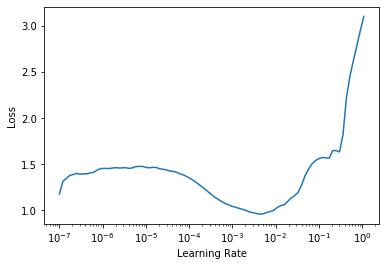

In [49]:
learn.lr_find()

In [51]:
max_lr = 1e-4

In [52]:
learn.fit_one_cycle(n_epoch=cycles, max_lr=max_lr, wd=w_decay)

epoch,train_loss,valid_loss,exp_mmape,time
0,0.063193,0.065009,0.186616,00:46
1,0.057802,0.053963,0.184646,00:46
2,0.053710,0.050927,0.171305,00:46
3,0.050716,0.053298,0.188778,00:47
4,0.048593,0.047909,0.169234,00:46
5,0.046105,0.044367,0.159720,00:46
6,0.042858,0.042723,0.157587,00:46
7,0.037890,0.040462,0.152086,00:46
8,0.034181,0.038491,0.147917,00:46
9,0.029759,0.038430,0.147779,00:46


In [65]:
valid_preds = learn.get_preds()

In [78]:
# my metric
exp_mmape(valid_preds[0], valid_preds[1])

tensor(0.1478)

In [91]:
def rmse(y, y_pred):
    return np.sqrt(mse(y, y_pred))

In [92]:
# fastai2 course metric
rmse(valid_preds[0], valid_preds[1])

tensor(0.1960)

In [88]:
def rmsle(y, y_pred):
    return np.sqrt(msle(y, y_pred))

In [89]:
# kaggle competition metric
rmsle(np.exp(valid_preds[0]), np.exp(valid_preds[1]))

tensor(0.1960)

In [94]:
export_path = path/"exports"

In [96]:
learn.export(export_path/"dozers_1478")